<a href="https://colab.research.google.com/github/Shoab02/CNN/blob/main/dog-cat-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:21<00:00, 50.0MB/s]
100% 1.06G/1.06G [00:21<00:00, 53.9MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [9]:
#Using generators for data loading to avoid meemory issue

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize

def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [31]:
# Creating a CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 128)     

In [33]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(train_data, epochs=10, validation_data = validation_data)

Epoch 1/10
116/625 [====>.........................] - ETA: 39s - loss: 0.7017 - accuracy: 0.5418

KeyboardInterrupt: ignored

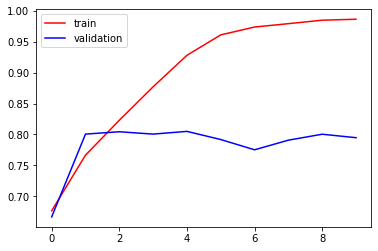

In [15]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


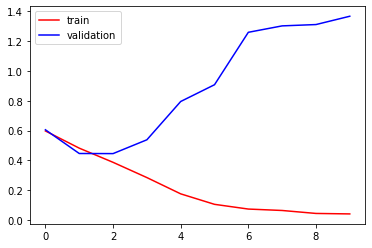

In [16]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


We can clearly see from the above plots that there is a major issue of **overfitting**

**Let's create another model adding dropout and batch normalization layers to reduce overfitting
Batch norm also helps in the training
**

In [35]:
from keras.layers import BatchNormalization, Dropout

In [40]:

model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_2.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_2.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model_2.add(Flatten())

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1,activation='sigmoid'))



In [41]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_11 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [42]:
model_2.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [43]:
history_2 = model_2.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 99s 117ms/step - loss: 1.0847 - accuracy: 0.5985 - val_loss: 0.5887 - val_accuracy: 0.6798
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5604 - accuracy: 0.7120 - val_loss: 0.5318 - val_accuracy: 0.7254
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5182 - accuracy: 0.7531 - val_loss: 0.4938 - val_accuracy: 0.7642
Epoch 4/10
625/625 [==============================] - 73s 115ms/step - loss: 0.4317 - accuracy: 0.8013 - val_loss: 0.5662 - val_accuracy: 0.7286
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3663 - accuracy: 0.8375 - val_loss: 0.4852 - val_accuracy: 0.7870
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2884 - accuracy: 0.8778 - val_loss: 0.4588 - val_accuracy: 0.8192
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2102 - accuracy: 0.9151 - val_loss: 0.5389 - val_ac

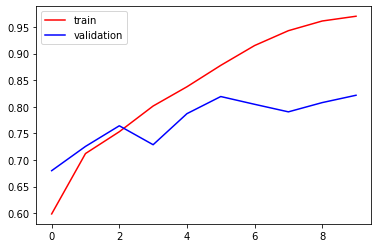

In [44]:
plt.plot(history_2.history['accuracy'], color='red', label='train')
plt.plot(history_2.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()                                            

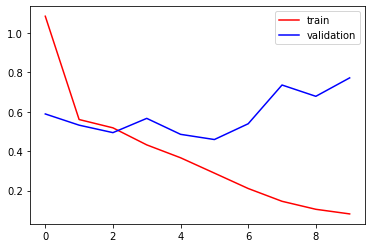

In [45]:
plt.plot(history_2.history['loss'], color='red', label='train')
plt.plot(history_2.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show() 

As we can see, adding batch norm and dropout has helped reduce overfitting